Homework 2
==========

In this homework...

* Parse a data set of annual CO2 emissions by country/region

* Demonstrate the central limit theorem

* Compare the mean CO2 emissions of countries using ANOVA

Data Source: https://github.com/owid/co2-data

Problem statement
-----------------------

1. From `data/global_CO2_emissions.csv`, load columns `country`, `year`, and `co2` into a Pandas data frame using the `pd.read_csv` function. Organize the data frame such that country name serves as the indexing column. Delete any rows with missing values. Print the head of the data frame using the `.head()` method.

2. Isolate available records of CO2 emissions from all countries/regions for the years 2000 and 2010. Print the head of the updated data frame.

3. Randomly draw (with replacement) 100 samples of 10 countries/regions each, and plot the distribution of the mean 2010 CO2 emissions for these 100 samples.

4. Randomly draw (with replacement) 100 samples of 40 countries/regions each, and plot the distribution of the mean 2010 CO2 emissions for these 100 samples. Repeat the process for sample sizes of 60, 80, 100, 200 countries/regions. What do you observe?

5. Filter out the top 15 percent of countries/regions by emissions for the year 2000 and 2010. Generate a quantile-quantile plot to assess the distribution of CO2 emissions for the remaining countries. Do CO2 emissions appear roughly normally distributed in each year? Describe the distribution you observe. Is a t-test an appropriate method for comparing the mean CO2 emissions between 2000 and 2010 for these countries/regions?

6. Log transform the CO2 emissions in 2000 and 2010 and reassess normality, leaving out the top 15% of countries/regions.

7. Assuming that required assumptions hold, compare the mean log-transformed CO2 emissions in 2000 and 2010 using a t-test. State the null and alternative hypotheses of this test. Is there a statistically significant difference in mean CO2 emissions emissions during these years?

8. Interpret the meaning of the p-value. What does the p-value represent?

Import modules

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

Define a two-sided t-test

In [63]:
def Welch_Satterthwaite_equation(stdev_1, stdev_2, n_1, n_2):
    """Get the degrees of freedom for a two-sample t-test with unqual sample variances.

    When two samples have an unequal variance, the "approximate effective degrees of
    freedom" for a t-test comparing their means is given by the Welch-Satterthwaite
    equation. The origin of this approximation is beyond the scope of this class, and is
    discussed in:

    1. https://doi.org/10.2307/3002019 (Satterthwaite 1946)
    2. https://doi.org/10.2307/2332510 (Welch 1947)

    Parameters
    ----------
    stdev_1, stdev_2 : float
        Standard deviation of the first and second samples
    n_1, n_2 : float
        Number of data points in the first and second samples

    Returns
    -------
    float
        Degrees of freedom for a two-sample
    """
    return round(
        (stdev_1**2 / n_1 + stdev_2**2 / n_2) ** 2 /
            (stdev_1 ** 4 / (n_1 ** 2 * (n_1 - 1)) +
                stdev_2 ** 4 / (n_2 ** 2 * (n_2 - 1)))
    )

def t_test_two_sided(set_1, set_2):
    """Run a t-test on the two data sets.

    Parameters
    ----------
    set_1: np.ndarray
        First sample of data points in hypothesis test
    set_2: np.ndarray
        Second sample of data points in hypothesis test

    Returns
    -------
    P-value for a two-sided hypothesis test where the null hypothesis is that
        the mean is zero and the alternative hypothesis is that the mean is not zero
    """
    # Calculate means, standard deviations, and sample sizes
    mean_1 = np.average(set_1)
    mean_2 = np.average(set_2)
    stdev_1 = np.std(set_1)
    stdev_2 = np.std(set_2)
    n_1 = len(set_1)
    n_2 = len(set_2)

    # Calculate degrees of freedom
    df = Welch_Satterthwaite_equation(stdev_1, stdev_2, n_1, n_2)

    # Generate t-statistic
    t = (mean_1 - mean_2) / (np.sqrt(stdev_1**2/n_1 + stdev_2**2/n_2))
    
    # return p-value
    return stats.t.sf(np.abs(t), df) * 2 

1. From `data/global_CO2_emissions.csv`, load columns `country`, `year`, and `co2` into a Pandas data frame using the `pd.read_csv` function. Organize the data frame such that country name serves as the indexing column. Print the head of the data frame using the `.head()` method.

In [161]:
data = pd.read_csv("data/global_CO2_emissions.csv", header=0)
exp_data = data[['country', 'year','co2']]
exp_data = exp_data.set_index('country')
exp_data.head()

,year,co2
country,,
Afghanistan,1949,0.015
Afghanistan,1950,0.084
Afghanistan,1951,0.092
Afghanistan,1952,0.092
Afghanistan,1953,0.106


2. Isolate available records of CO2 emissions from all countries for the years 2000 and 2010. Print the head of the updated data frame.

In [162]:
years = [2000, 2010]
exp_data = exp_data[exp_data.year.isin(years)]
exp_data.head()

,year,co2
country,,
Afghanistan,2000,0.758
Afghanistan,2010,8.398
Africa,2000,880.469
Africa,2010,1206.780
Albania,2000,3.004


3. Randomly draw (with replacement) 100 samples of 10 countries/regions each, and plot the distribution of the mean 2010 CO2 emissions for these 100 samples.

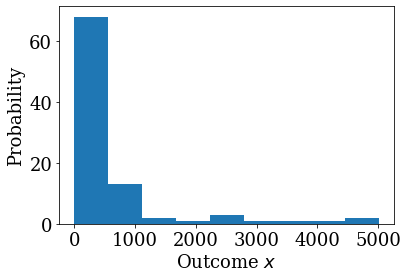

In [163]:
num_exp = 10
num_realizations = 100

data_2010 = exp_data.loc[exp_data['year'] == 2010]

y = np.array([])
for i_exp in range(num_realizations):
    y = np.append(y, np.mean(np.random.choice(data_2010['co2'], num_exp))) #prop_x is 2010 emissions

y = y[~np.isnan(y)]
#print(y)
#generate probability array
x = np.linspace(0, np.max(y), num_exp)
prob_y, x_bin = np.histogram(y, bins=x, density = True)

plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
#print(prob_y)

#plt.plot(x[:-1],prob_y)
plt.hist(y,x_bin) #both are fine

plt.xlabel('Outcome $x$')
plt.ylabel('Probability')

plt.show()

4. Randomly draw (with replacement) 100 samples of 40 countries/regions each, and plot the distribution of the mean 2010 CO2 emissions for these 100 samples. Repeate the process for sample sizes of 60, 80, 100, 200 countries/regions. What do you observe?

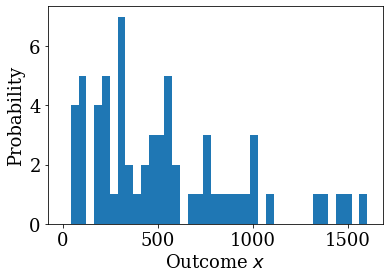

In [166]:
num_exp = 40
num_realizations = 100

data_2010 = exp_data.loc[exp_data['year'] == 2010]

y = np.array([])
for i_exp in range(num_realizations):
    y = np.append(y, np.mean(np.random.choice(data_2010['co2'], num_exp))) #prop_x is 2010 emissions

y = y[~np.isnan(y)]

#generate probability array
x = np.linspace(0, np.max(y), num_exp)
prob_y, x_bin = np.histogram(y, bins=x, density = True)

plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

#plt.plot(x[:-1],prob_y)
plt.hist(y,x_bin)

plt.xlabel('Outcome $x$')
plt.ylabel('Probability')

plt.show()


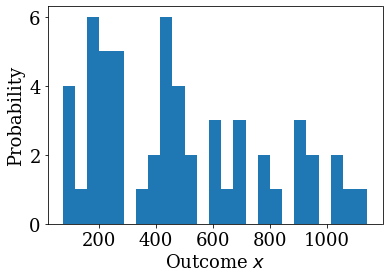

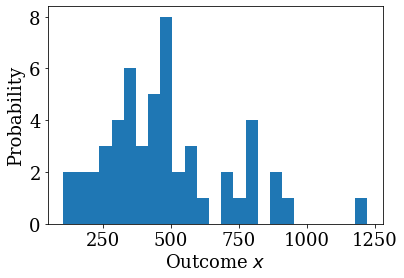

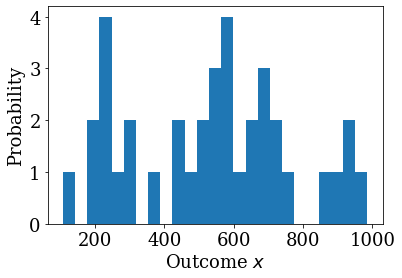

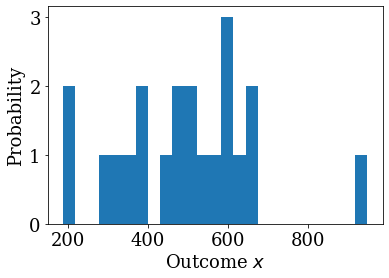

In [167]:
num_exp = [60,80,100,200]
num_realizations = 100

data_2010 = exp_data.loc[exp_data['year'] == 2010]

for i in num_exp:
    y = np.array([])
    for i_exp in range(num_realizations):
        y = np.append(y, np.mean(np.random.choice(data_2010['co2'], i))) #prop_x is 2010 emissions

    y = y[~np.isnan(y)]

    #generate probability array
    x = np.linspace(0, np.max(y), i)
    prob_y, x_bin = np.histogram(y, bins=x, density = True)

    plt.figure()
    font = {'family' : 'serif',
            'weight':'normal',
            'size': 18}
    plt.rc('font', **font)

    #plt.plot(x[:-1],prob_y)
    plt.hist(y,25)

    plt.xlabel('Outcome $x$')
    plt.ylabel('Probability')

    plt.show()



We observe that the "outcome x" range keeps getting smaller with increasing realizations/sample sizes. This aligns with the central limit theorem since the ditribution is becoming narrow with increasing N.

5. Filter out the top 15 percent of countries/regions by emissions for the year 2000 and 2010. Generate a quantile-quantile plot to assess the distribution of CO2 emissions for the remaining countries. Do CO2 emissions appear roughly normally distributed in each year? Describe the distribution you observe. Is a t-test an appropriate method for comparing the mean CO2 emissions between 2000 and 2010 for these countries/regions?

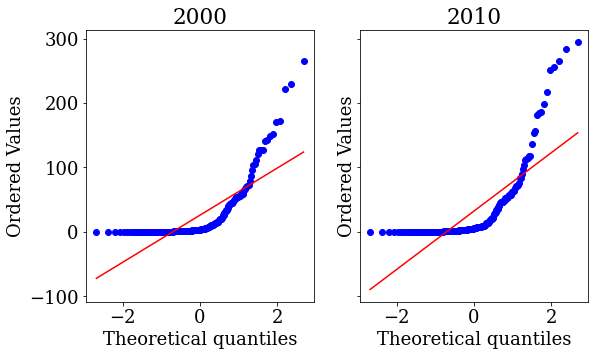

In [168]:
#t_test file
data_2000 = exp_data.loc[exp_data['year'] == 2000]

data_2000 = data_2000[~np.isnan(data_2000['co2'])]
data_2010 = data_2010[~np.isnan(data_2010['co2'])]

top15_2000 = data_2000['co2'].quantile(.85)
top15_2010 = data_2010['co2'].quantile(.85)

co2_2000_top15 = data_2000[data_2000['co2']<top15_2000]
co2_2010_top15 = data_2010[data_2010['co2']<top15_2010]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 5), sharex=True, sharey=True)
ax0, ax1 = axes.flatten()
stats.probplot(co2_2000_top15['co2'], dist="norm", plot=ax0)
ax0.set_title("2000")
stats.probplot(co2_2010_top15['co2'], dist="norm", plot=ax1)
ax1.set_title("2010")

plt.show()

No, the CO2 emissions do not appear normally distributed for 2000 or 2010. If they were, they would follow the linear regression indicating that the observed values are linearly related to the theoretical quantiles.
No, a t-test in not an appropriate method because the data does not appear gaussian/normally ditributed.
This data appears to follow an exponential ditribution as observed with the growing difference between the linear regression and the data as the theoretical quantile increases.

6. Log transform the CO2 emissions in 2000 and 2010 and reassess normality, leaving out the top 15% of countries/regions..

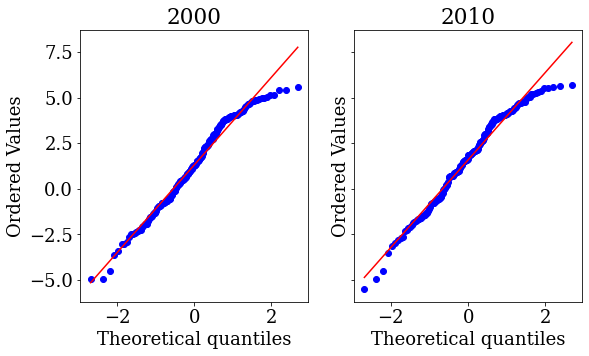

In [169]:
data_2000_log = np.log(data_2000['co2'])
data_2010_log = np.log(data_2010['co2'])

top15_2000_log = data_2000_log.quantile(.85)
top15_2010_log = data_2010_log.quantile(.85)

co2_2000_top15_log = data_2000_log[data_2000_log<top15_2000_log]
co2_2010_top15_log = data_2010_log[data_2010_log<top15_2010_log]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 5), sharex=True, sharey=True)
ax0, ax1 = axes.flatten()
stats.probplot(co2_2000_top15_log, dist="norm", plot=ax0)
ax0.set_title("2000")
stats.probplot(co2_2010_top15_log, dist="norm", plot=ax1)
ax1.set_title("2010")

plt.show()


7. Assuming that required assumptions hold, compare the mean log-transformed CO2 emissions in 2000 and 2010 using a t-test. State the null and alternative hypotheses of this test. Is there a statistically significant difference in mean CO2 emissions emissions during these years?

In [170]:
p = t_test_two_sided(co2_2000_top15_log.values, co2_2010_top15_log.values)

print('P-value: ',p)

P-value:  0.2584896370847514


Null hypothesis: The difference between the means of the two data sets is zero.
Alternative hypothesis: The difference between the means of the two data sets is not zero.

We fail to reject the null hypothesis because the P-value > 0.05, our confidence threshold. Therefore we cannot claim that there is significant statistical difference in the means between these two years.

8. Interpret the meaning of the p-value. What does the p-value represent?

The p-value is the probability that an observed difference between the data sets occurred by chance. Therefore, with a p-value less than 5%, we could safely reject the null hypothesis with the chance of observing no difference in the means being very small. But since our p-value was above our desired threshold, the probability of observing no significant difference is too high to reject the null. Ultimately, a smaller p-value represents a higher probability of the observing the statistical difference between the data sets (referenced Investopedia).